# Importing librarys

In [1]:
# importing librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

## Download the data

In [ ]:
tm_medium_data = yf.download("TM", period="2y", interval="1h")

[*********************100%***********************]  1 of 1 completed


In [ ]:
tm_medium_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TM,TM,TM,TM,TM,TM
Datetime,,,,,,
2023-01-30 14:30:00+00:00,145.910004,145.910004,146.289597,145.649994,146.000000,48400
2023-01-30 15:30:00+00:00,145.794998,145.794998,146.143799,145.619995,145.884796,22140
2023-01-30 16:30:00+00:00,145.839996,145.839996,145.949997,145.690002,145.860001,18622
2023-01-30 17:30:00+00:00,145.889999,145.889999,145.979996,145.690002,145.850006,17040
2023-01-30 18:30:00+00:00,145.660004,145.660004,145.929993,145.570007,145.850006,19991


In [ ]:
# rename the columns "Close", "High", "Low", "Open", "Volume"
tm_medium_data.columns = ["AdjClose","Close", "High", "Low", "Open", "Volume"]

In [ ]:
tm_medium_data.tail()

,AdjClose,Close,High,Low,Open,Volume
Datetime,,,,,,
2025-01-28 16:30:00+00:00,184.779999,184.779999,184.800003,184.149994,184.539993,21092
2025-01-28 17:30:00+00:00,185.274002,185.274002,185.359894,184.710007,184.770004,27813
2025-01-28 18:30:00+00:00,184.985001,184.985001,185.410004,184.889999,185.360001,44903
2025-01-28 19:30:00+00:00,185.139999,185.139999,185.429993,184.985001,184.985001,90210
2025-01-28 20:30:00+00:00,185.350006,185.350006,185.399994,184.830002,185.110001,84601


In [ ]:
tm_medium_data.shape

(3487, 6)

In [ ]:
tm_medium_data.describe()

,AdjClose,Close,High,Low,Open,Volume
count,3487.000000,3487.000000,3487.000000,3487.000000,3487.000000,3487.000000
mean,181.947129,181.947129,182.278650,181.595883,181.944516,42122.187841
std,29.805392,29.805392,29.854183,29.746238,29.805176,30104.552047
min,132.660004,132.660004,133.035004,132.350006,132.750000,6099.000000
25%,165.034996,165.034996,165.289894,164.720047,164.989998,23505.500000
50%,178.979996,178.979996,179.369202,178.695007,179.000000,33889.000000
75%,197.580002,197.580002,197.959999,197.342453,197.719994,50278.500000
max,255.220001,255.220001,255.229996,254.622894,255.199997,434348.000000


In [ ]:
tm_medium_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3487 entries, 2023-01-30 14:30:00+00:00 to 2025-01-28 20:30:00+00:00
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AdjClose  3487 non-null   float64
 1   Close     3487 non-null   float64
 2   High      3487 non-null   float64
 3   Low       3487 non-null   float64
 4   Open      3487 non-null   float64
 5   Volume    3487 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 190.7 KB


In [ ]:
# check for the missing values
tm_medium_data.isnull().sum()

,0
AdjClose,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [ ]:
# download the data
tm_medium_data.to_csv("tm_medium_data.csv")

## Loading the data

In [2]:
tm_medium_data = pd.read_csv("tm_medium_data.csv")

In [3]:
tm_medium_data.head()

,Datetime,AdjClose,Close,High,Low,Open,Volume
0,2023-01-30 14:30:00+00:00,145.910004,145.910004,146.289597,145.649994,146.000000,48400
1,2023-01-30 15:30:00+00:00,145.794998,145.794998,146.143799,145.619995,145.884796,22140
2,2023-01-30 16:30:00+00:00,145.839996,145.839996,145.949997,145.690002,145.860001,18622
3,2023-01-30 17:30:00+00:00,145.889999,145.889999,145.979996,145.690002,145.850006,17040
4,2023-01-30 18:30:00+00:00,145.660004,145.660004,145.929993,145.570007,145.850006,19991


In [4]:
tm_medium_data.shape

(3487, 7)

## Univariate Analysis

In [7]:
tm_medium_data.describe()

,AdjClose,Close,High,Low,Open,Volume
count,3487.000000,3487.000000,3487.000000,3487.000000,3487.000000,3487.000000
mean,181.947129,181.947129,182.278650,181.595883,181.944516,42122.187841
std,29.805392,29.805392,29.854183,29.746238,29.805176,30104.552047
min,132.660004,132.660004,133.035004,132.350006,132.750000,6099.000000
25%,165.034996,165.034996,165.289894,164.720047,164.989998,23505.500000
50%,178.979996,178.979996,179.369202,178.695007,179.000000,33889.000000
75%,197.580002,197.580002,197.959999,197.342453,197.719994,50278.500000
max,255.220001,255.220001,255.229996,254.622894,255.199997,434348.000000


In [8]:
tm_medium_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3487 entries, 0 to 3486
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  3487 non-null   object 
 1   AdjClose  3487 non-null   float64
 2   Close     3487 non-null   float64
 3   High      3487 non-null   float64
 4   Low       3487 non-null   float64
 5   Open      3487 non-null   float64
 6   Volume    3487 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 190.8+ KB


In [9]:
# change Datetime data
tm_medium_data['Datetime'] = pd.to_datetime(tm_medium_data['Datetime'])

In [10]:
# skewness and kurtosis
print("Skewness:", tm_medium_data.select_dtypes(include=np.number).skew())
print("Kurtosis:", tm_medium_data.select_dtypes(include=np.number).kurtosis())

Skewness: AdjClose    0.403476
Close       0.403476
High        0.401950
Low         0.404603
Open        0.403906
Volume      3.114065
dtype: float64
Kurtosis: AdjClose    -0.328880
Close       -0.328880
High        -0.329047
Low         -0.328194
Open        -0.328129
Volume      18.252044
dtype: float64


## Distribution Analysis

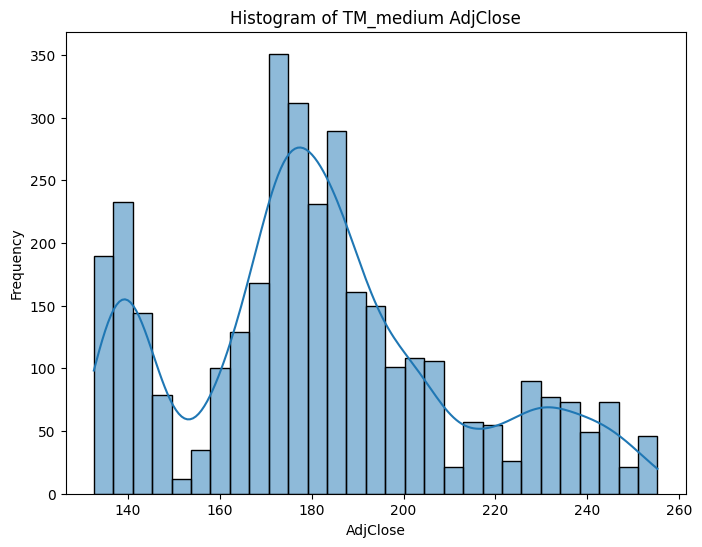

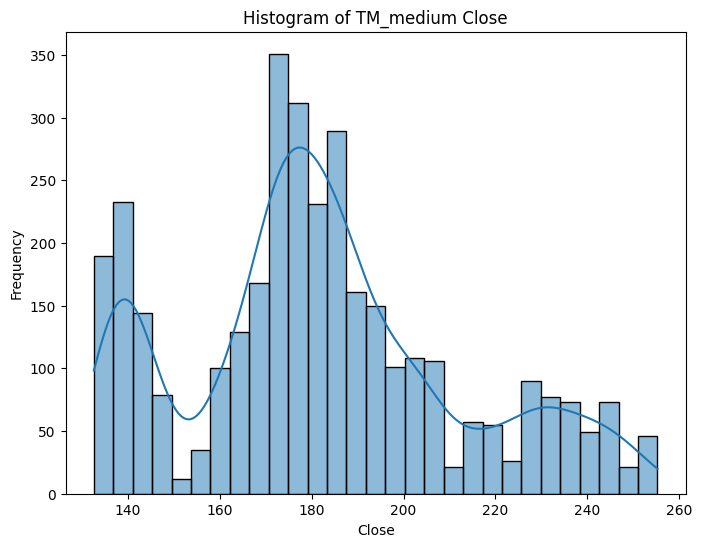

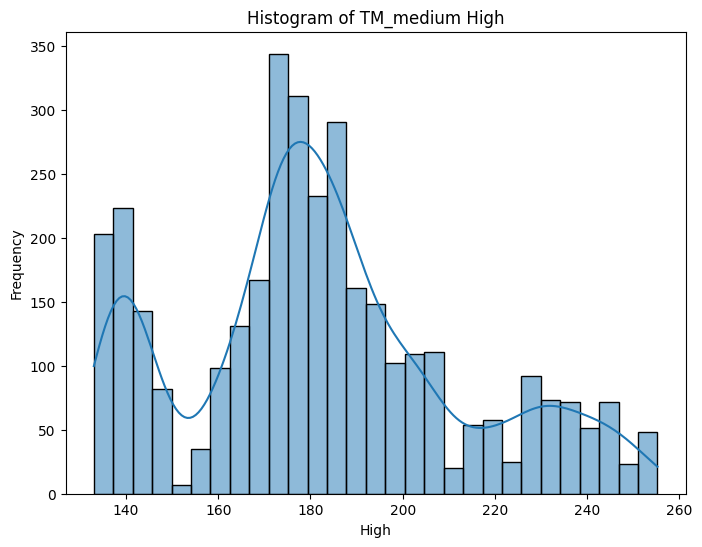

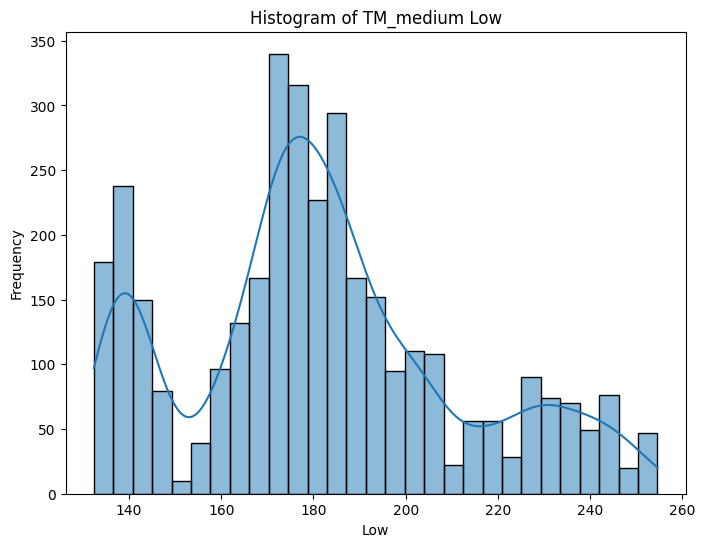

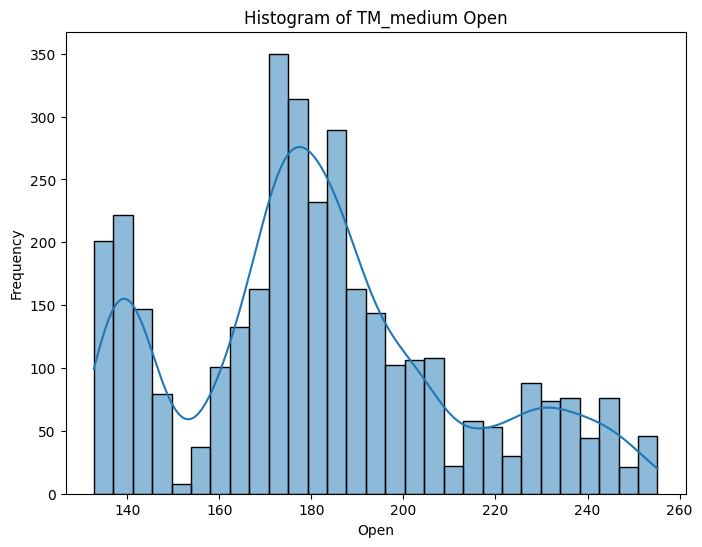

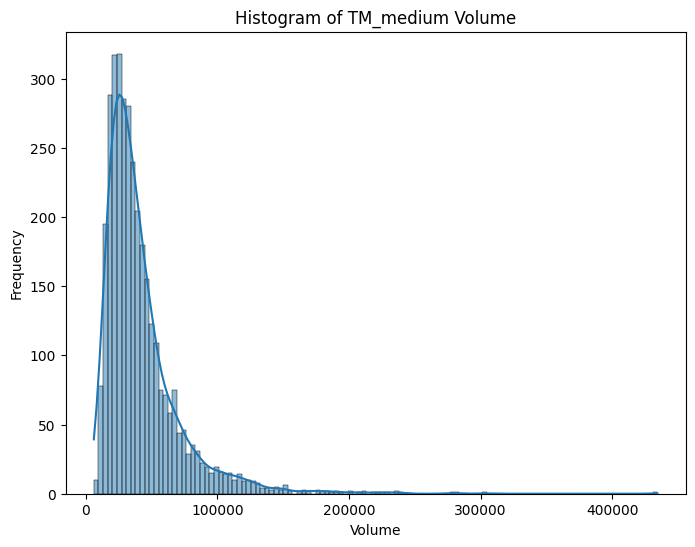

In [12]:
# Identify numerical columns
numerical_columns = tm_medium_data.select_dtypes(include=[np.number]).columns

# Perform univariate analysis on numerical columns
for column in numerical_columns:
    # For continuous variables
    if len(tm_medium_data[column].unique()) > 10:
        plt.figure(figsize=(8, 6))
        sns.histplot(tm_medium_data[column], kde=True)
        plt.title(f'Histogram of TM_medium {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

## Trend Analysis

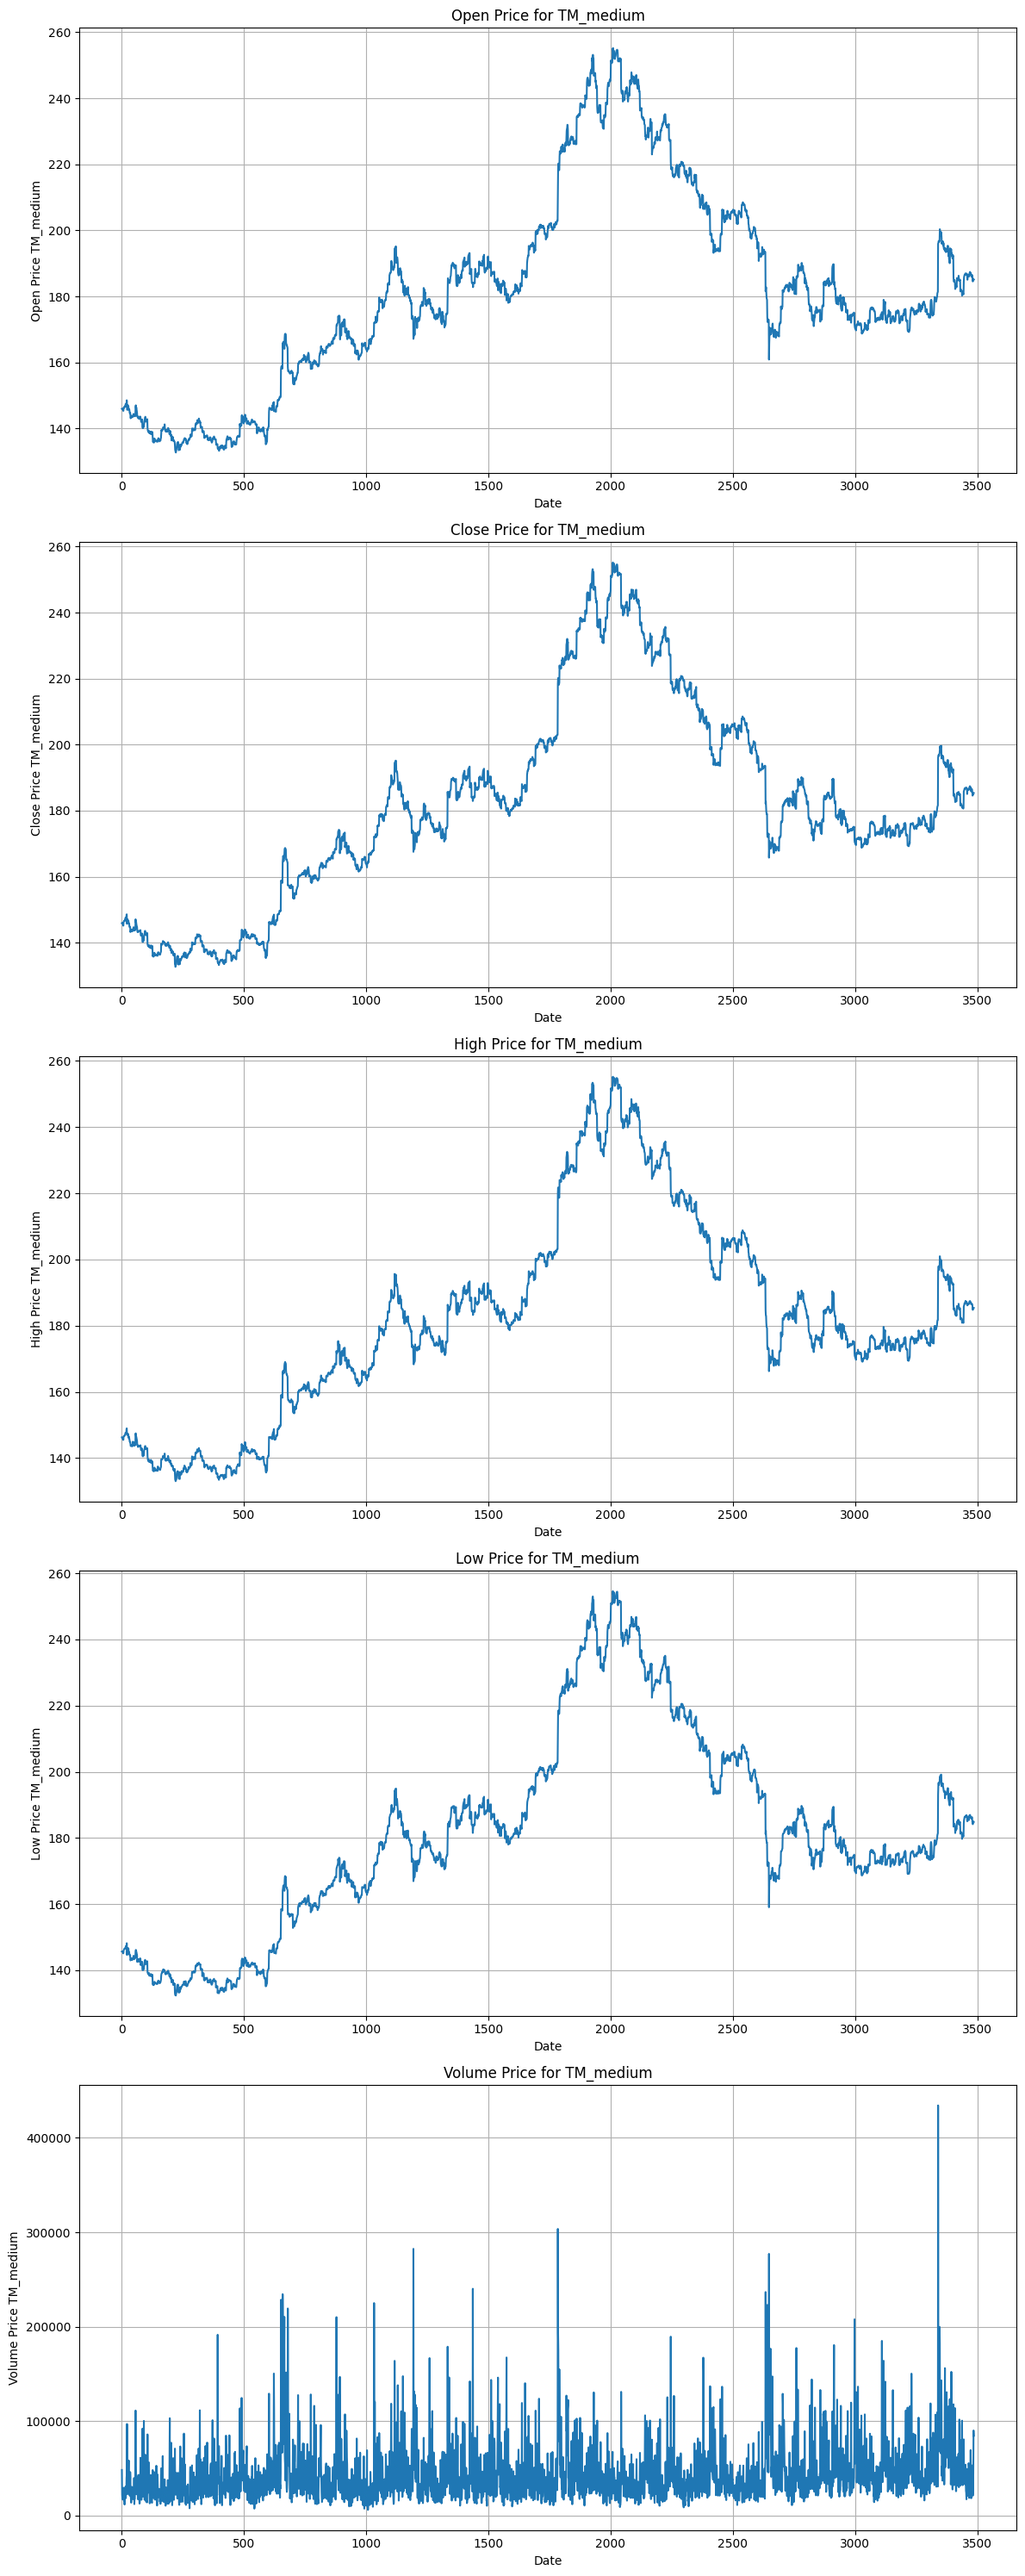

In [13]:
# List of columns to plot
columns = ['Open', 'Close', 'High', 'Low', 'Volume']

# Create subplots
fig, axes = plt.subplots(len(columns), 1, figsize=(12, 6 * len(columns)))

# Loop through each column and plot
for i, col in enumerate(columns):
    axes[i].plot(tm_medium_data.index, tm_medium_data[col])
    axes[i].set_title(f'{col} Price for TM_medium')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(f'{col} Price TM_medium')
    axes[i].grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

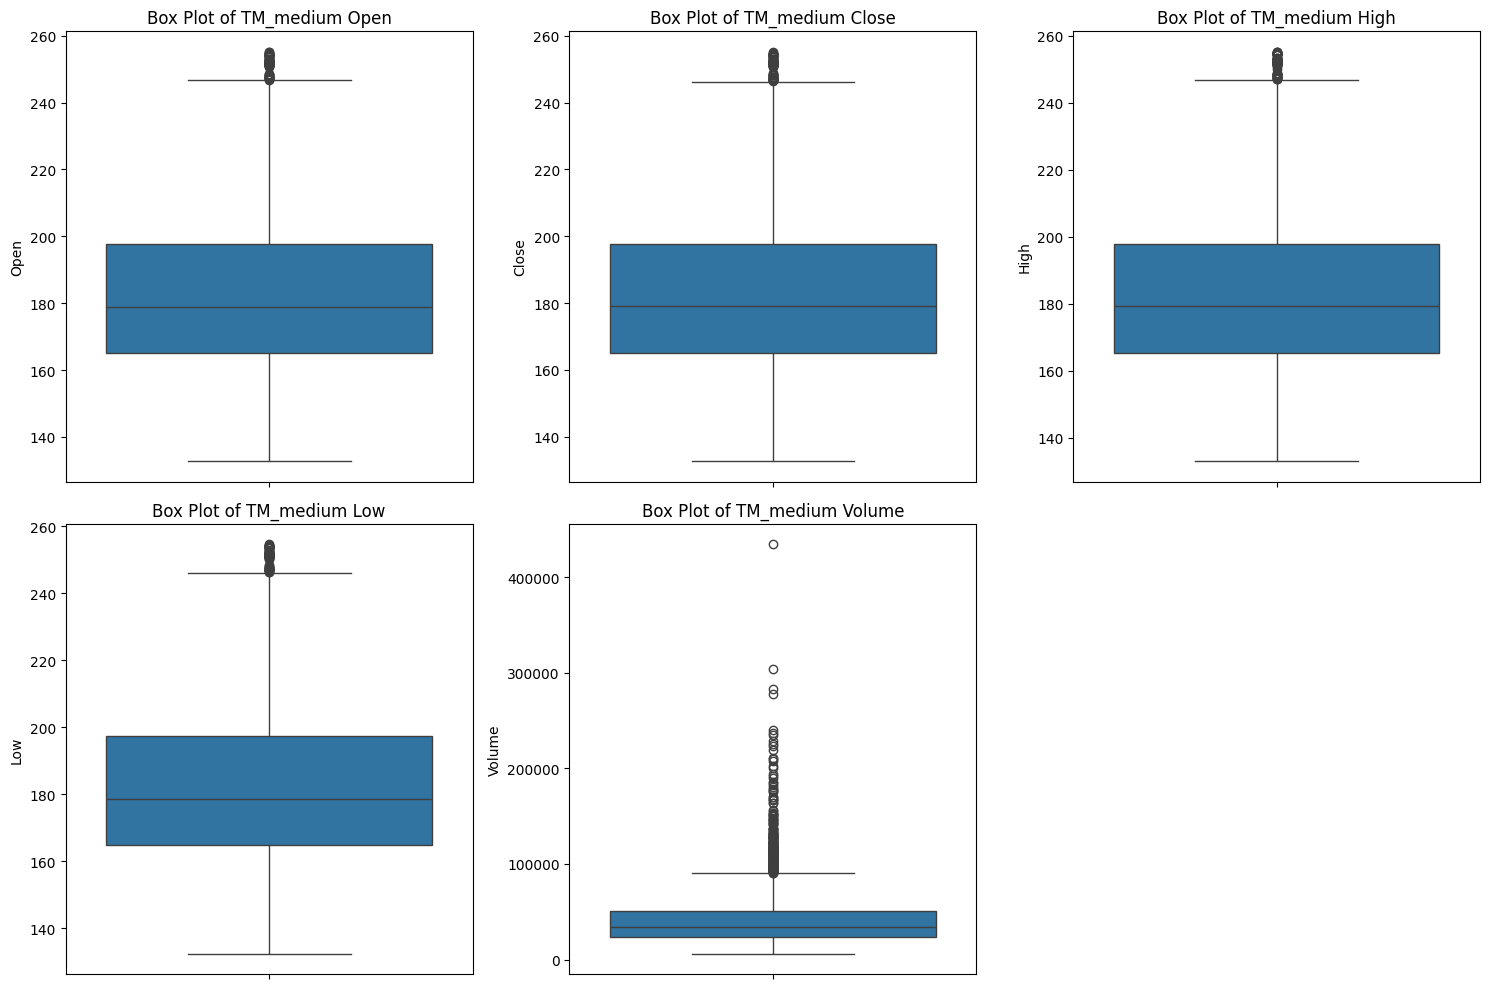

In [14]:
columns = ['Open', 'Close', 'High', 'Low', 'Volume']  # Columns to check

plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i, col in enumerate(columns):
    plt.subplot(2, 3, i + 1)  # Create subplots for each column
    sns.boxplot(y=tm_medium_data[col])
    plt.title(f'Box Plot of TM_medium {col}')

plt.tight_layout()
plt.show()

## Bivariate Analysis

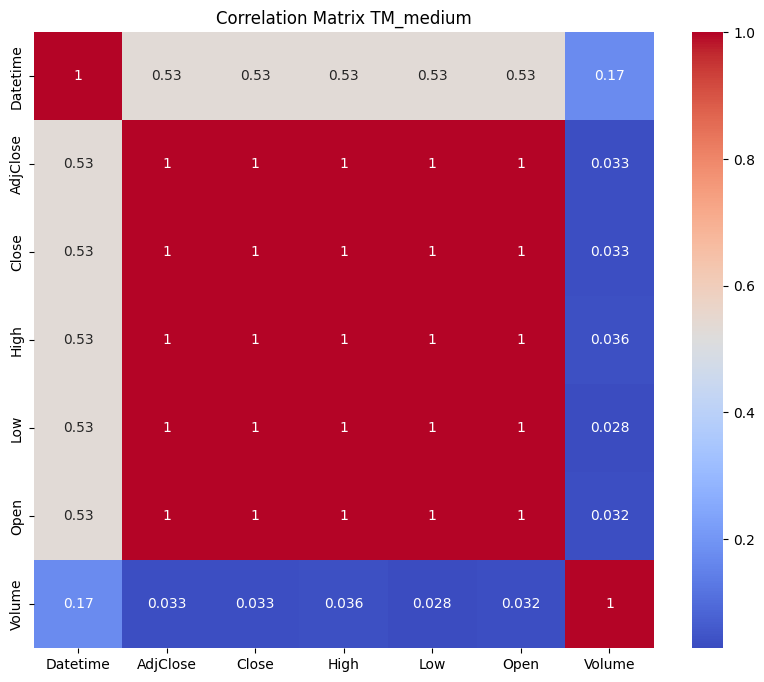

In [15]:
correlation_matrix = tm_medium_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix TM_medium')
plt.show()

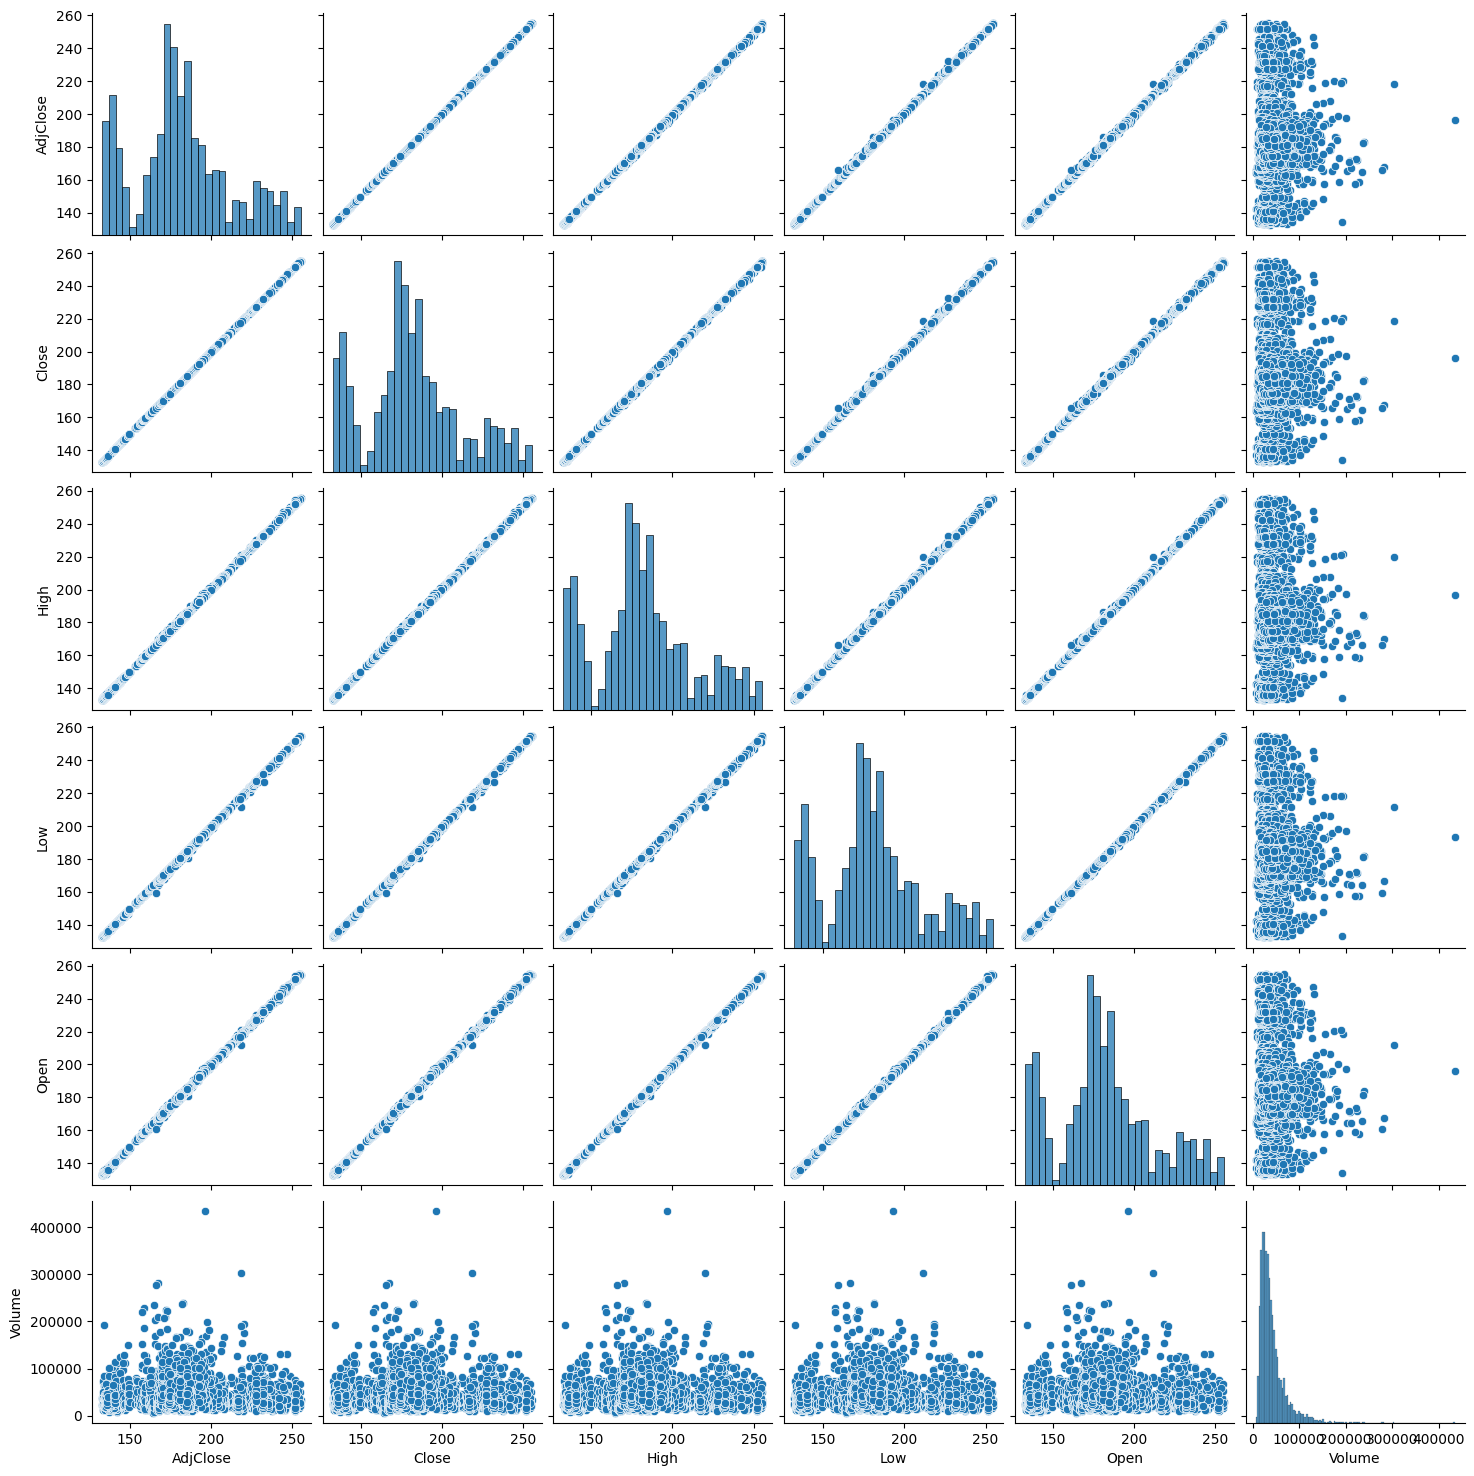

In [16]:
# pairs of numerical columns
sns.pairplot(tm_medium_data.select_dtypes(include=np.number))
plt.show()

Text(0.5, 1.0, 'TM_medium Relationship between Close Price and Trading Volume')

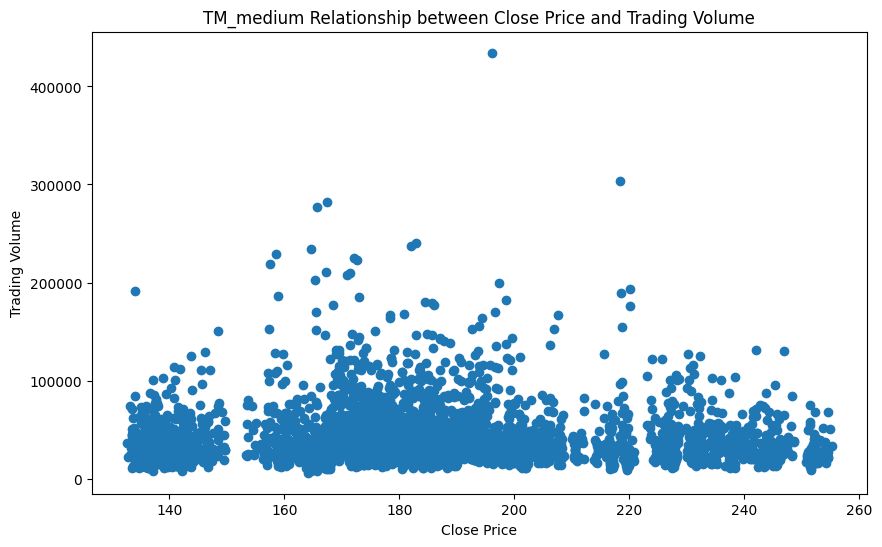

In [17]:
# relationship between price and trading volume
plt.figure(figsize=(10, 6))
plt.scatter(tm_medium_data['Close'], tm_medium_data['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Trading Volume')
plt.title('TM_medium Relationship between Close Price and Trading Volume')

# Feature Engineering

In [18]:
# Moving Average (SMA) with a 365-day window
window_sma = 365
tm_medium_data['SMA'] = tm_medium_data['Close'].rolling(window=window_sma).mean()

# Bollinger Bands with a 365-day window
tm_medium_data['StdDev'] = tm_medium_data['Close'].rolling(window=window_sma).std()
tm_medium_data['UpperBand'] = tm_medium_data['SMA'] + (2 * tm_medium_data['StdDev'])
tm_medium_data['LowerBand'] = tm_medium_data['SMA'] - (2 * tm_medium_data['StdDev'])

# RSI with a 60-day window
def calculate_rsi(data, window=60):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

tm_medium_data['RSI'] = calculate_rsi(tm_medium_data)

In [19]:
tm_medium_data.head()

,Datetime,AdjClose,Close,High,Low,Open,Volume,SMA,StdDev,UpperBand,LowerBand,RSI
0,2023-01-30 14:30:00+00:00,145.910004,145.910004,146.289597,145.649994,146.000000,48400,NaN,NaN,NaN,NaN,NaN
1,2023-01-30 15:30:00+00:00,145.794998,145.794998,146.143799,145.619995,145.884796,22140,NaN,NaN,NaN,NaN,NaN
2,2023-01-30 16:30:00+00:00,145.839996,145.839996,145.949997,145.690002,145.860001,18622,NaN,NaN,NaN,NaN,NaN
3,2023-01-30 17:30:00+00:00,145.889999,145.889999,145.979996,145.690002,145.850006,17040,NaN,NaN,NaN,NaN,NaN
4,2023-01-30 18:30:00+00:00,145.660004,145.660004,145.929993,145.570007,145.850006,19991,NaN,NaN,NaN,NaN,NaN


In [20]:
tm_medium_data.isna().sum()

,0
Datetime,0
AdjClose,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,364
StdDev,364
UpperBand,364


In [21]:
# fill na with mean
tm_medium_data.fillna(tm_medium_data.mean(), inplace=True)

In [22]:
tm_medium_data.isna().sum()

,0
Datetime,0
AdjClose,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,0
StdDev,0
UpperBand,0


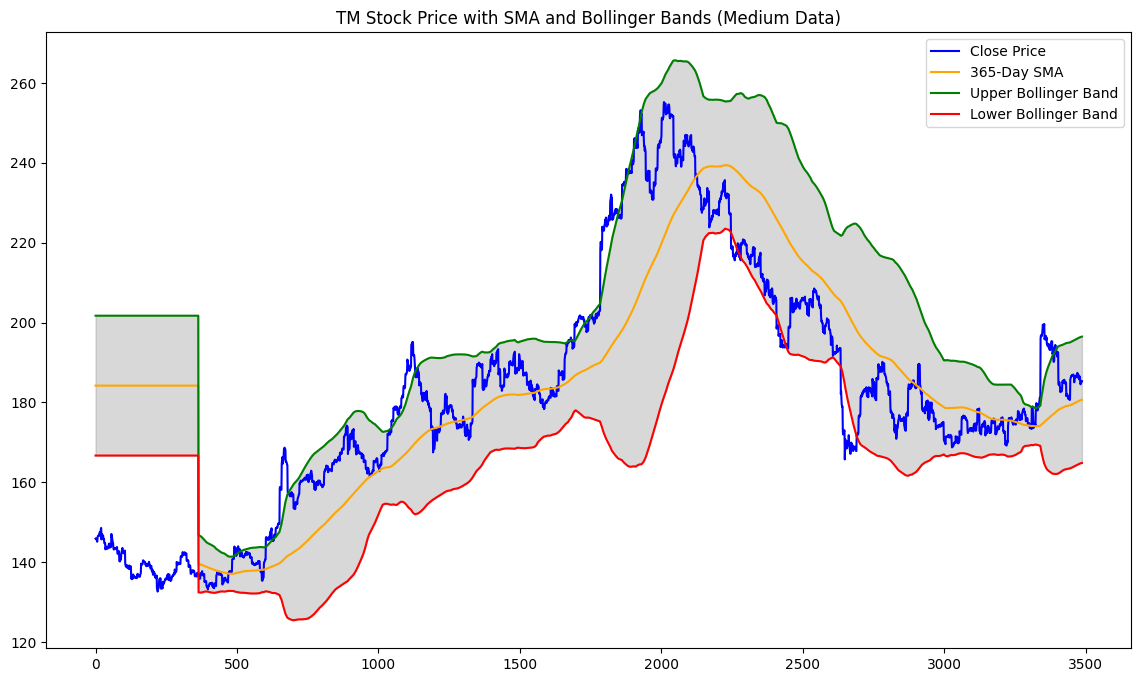

In [23]:
# Plot Close Price, SMA, and Bollinger Bands
plt.figure(figsize=(14, 8))
plt.plot(tm_medium_data['Close'], label='Close Price', color='blue')
plt.plot(tm_medium_data['SMA'], label=f'{window_sma}-Day SMA', color='orange')
plt.plot(tm_medium_data['UpperBand'], label='Upper Bollinger Band', color='green')
plt.plot(tm_medium_data['LowerBand'], label='Lower Bollinger Band', color='red')
plt.fill_between(tm_medium_data.index, tm_medium_data['UpperBand'], tm_medium_data['LowerBand'], color='gray', alpha=0.3)
plt.title('TM Stock Price with SMA and Bollinger Bands (Medium Data)')
plt.legend()
plt.show()

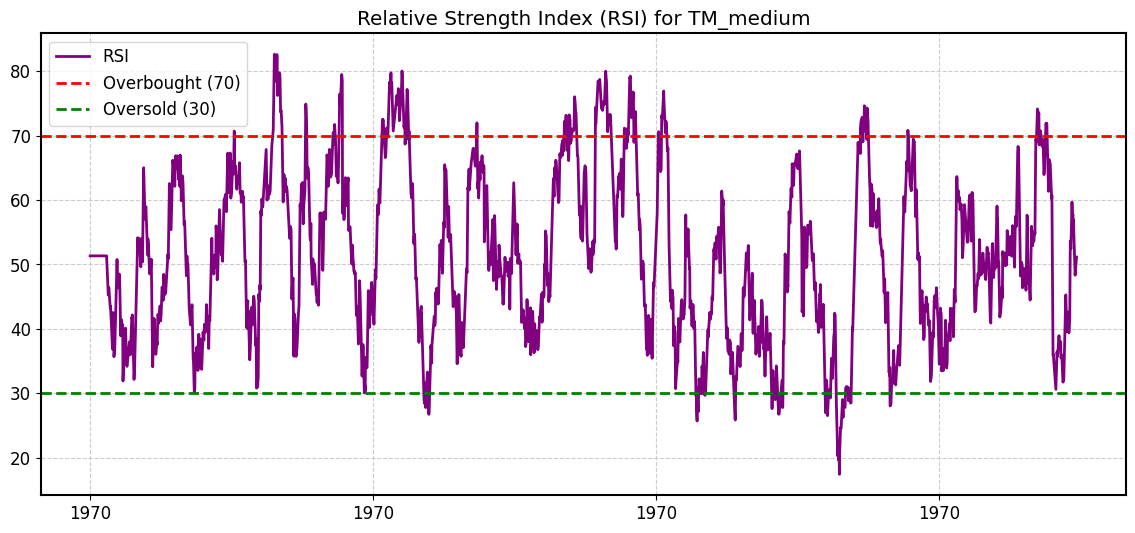

In [28]:
# Plot RSI
plt.figure(figsize=(14, 6))
plt.plot(tm_medium_data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', color='green', label='Oversold (30)')
plt.title('Relative Strength Index (RSI) for TM_medium')
plt.legend()
plt.show()

In [25]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 5.9 MB/s eta 0:00:00


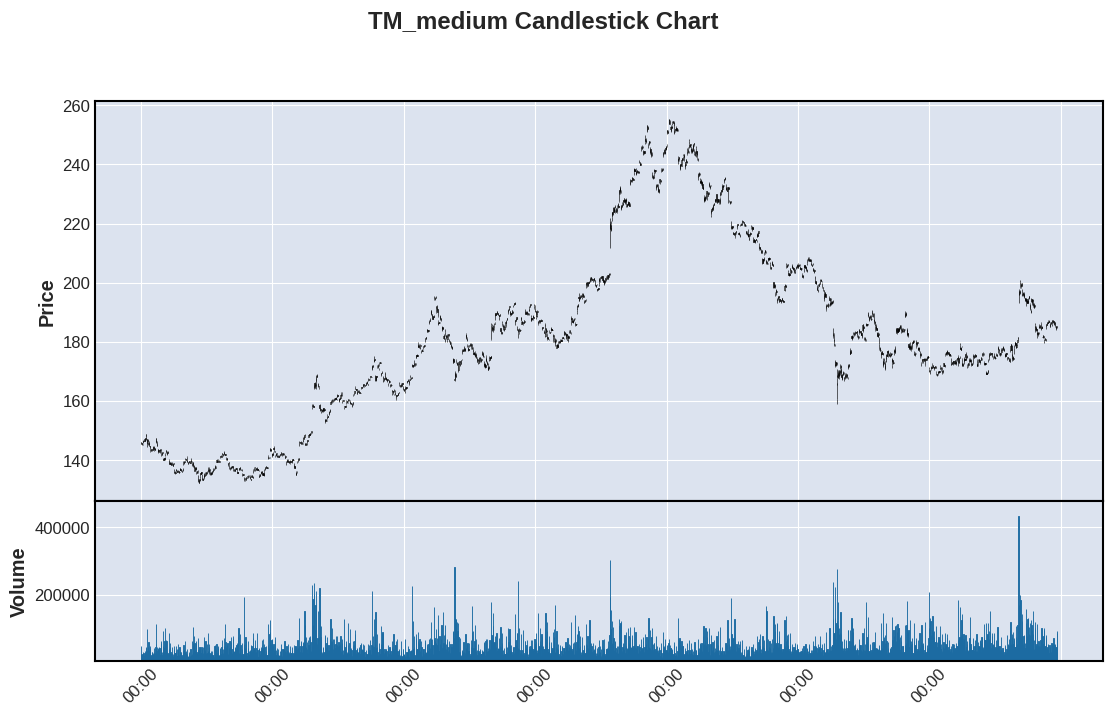

In [29]:
import mplfinance as mpf

# Ensure the index is a datetime object
tm_medium_data.index = pd.to_datetime(tm_medium_data.index)

# Plot candlestick chart
mpf.plot(tm_medium_data, type='candle', volume=True, figsize=(14, 8),
         title='TM_medium Candlestick Chart')

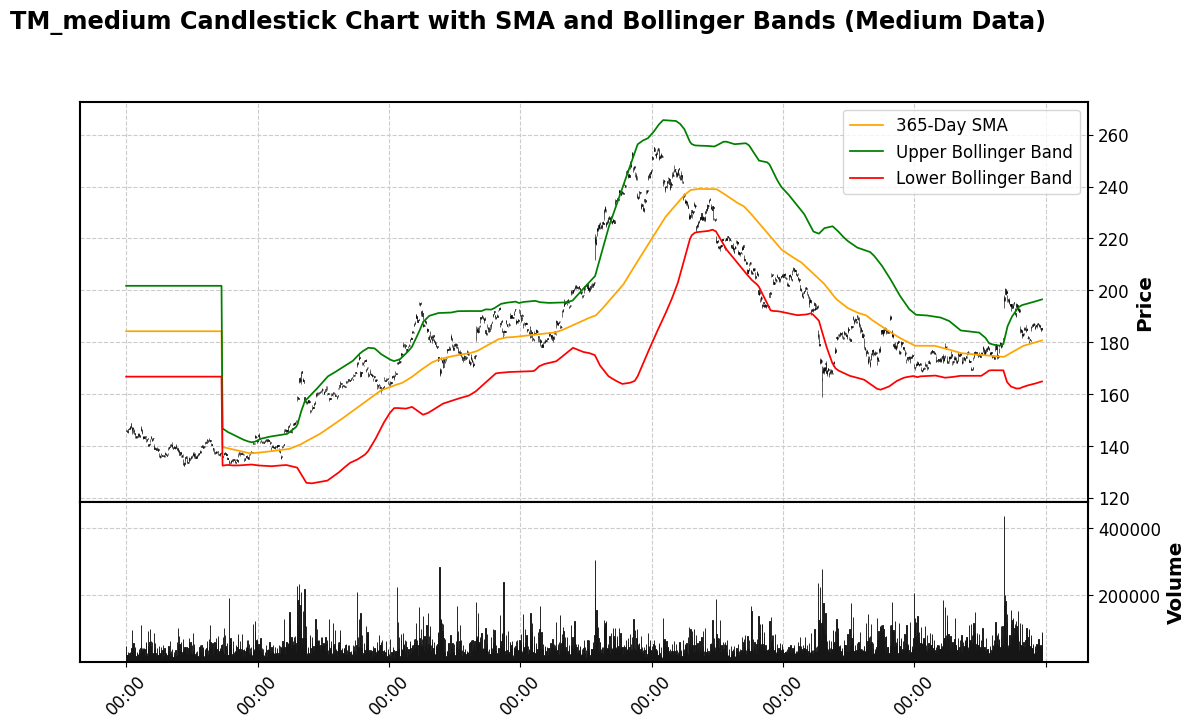

In [30]:
ap = [
    mpf.make_addplot(tm_medium_data['SMA'], color='orange', label=f'{window_sma}-Day SMA'),
    mpf.make_addplot(tm_medium_data['UpperBand'], color='green', label='Upper Bollinger Band'),
    mpf.make_addplot(tm_medium_data['LowerBand'], color='red', label='Lower Bollinger Band')
]

# Plot candlestick chart with SMA and Bollinger Bands
mpf.plot(
    tm_medium_data,
    type='candle',
    volume=True,
    addplot=ap,
    figsize=(14, 8),
    title='TM_medium Candlestick Chart with SMA and Bollinger Bands (Medium Data)',
    style='classic'  # You can change the style (e.g., 'classic', 'yahoo', 'charles')
)

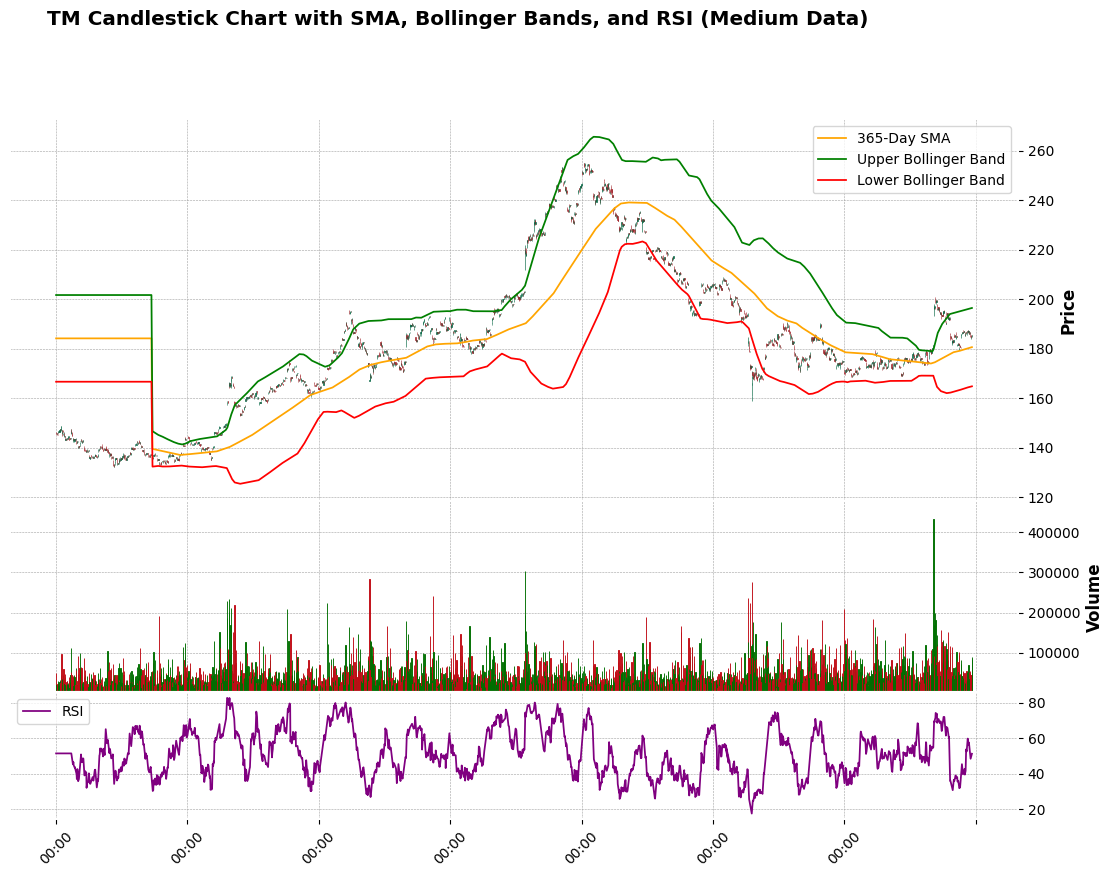

In [31]:


ap = [
    mpf.make_addplot(tm_medium_data['SMA'], color='orange', label=f'{window_sma}-Day SMA'),
    mpf.make_addplot(tm_medium_data['UpperBand'], color='green', label='Upper Bollinger Band'),
    mpf.make_addplot(tm_medium_data['LowerBand'], color='red', label='Lower Bollinger Band'),
    mpf.make_addplot(tm_medium_data['RSI'], panel=2, color='purple', label='RSI')  # RSI in a separate panel
]

# Plot candlestick chart with SMA, Bollinger Bands, and RSI
mpf.plot(
    tm_medium_data,
    type='candle',
    volume=True,
    addplot=ap,
    figsize=(14, 10),
    title='TM Candlestick Chart with SMA, Bollinger Bands, and RSI (Medium Data)',
    style='charles',
    panel_ratios=(6, 3, 2)  # Adjust panel ratios for main chart, RSI, and volume
)

## Time Series Decomposition

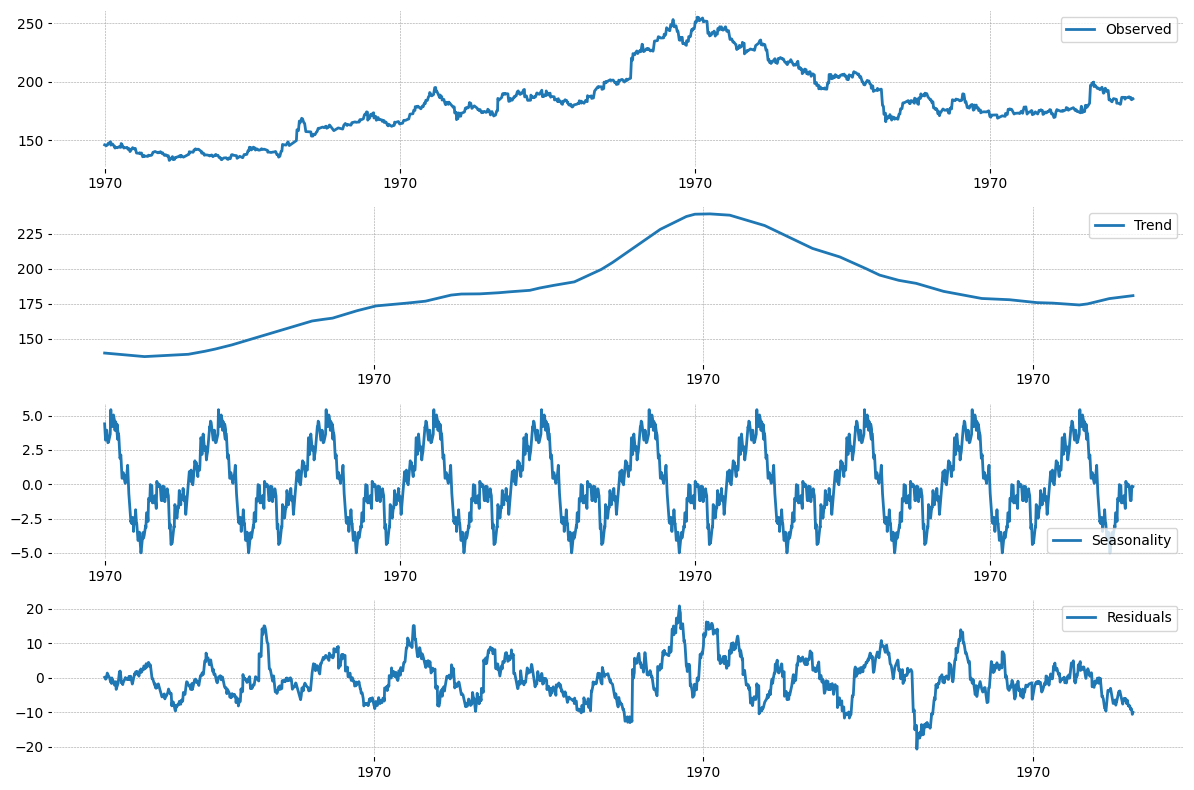

In [32]:
# Decompose the time series into trend, seasonality, and residual
decomposition = seasonal_decompose(tm_medium_data['Close'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Daily Returns & Volatility

Historical Volatility (Standard Deviation of Daily Returns): 0.61%


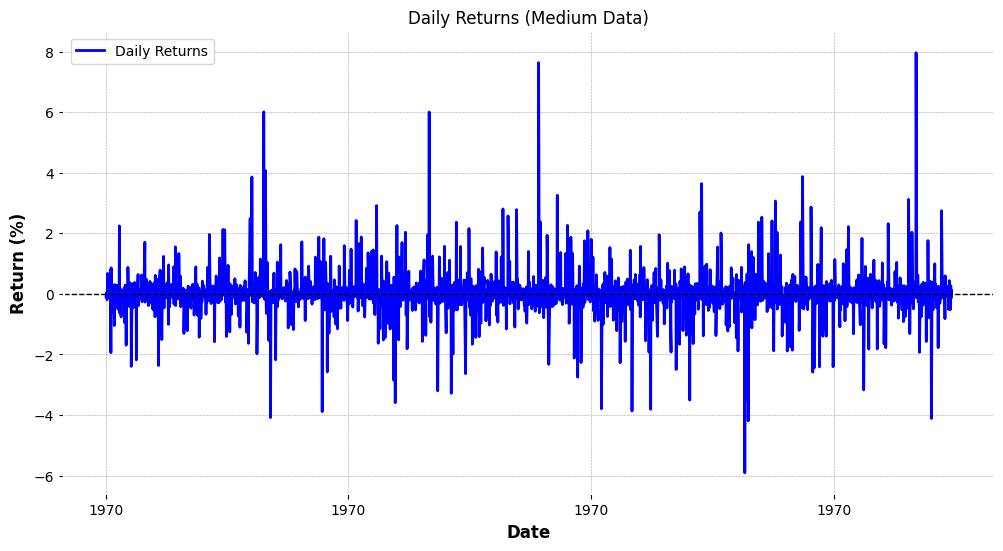

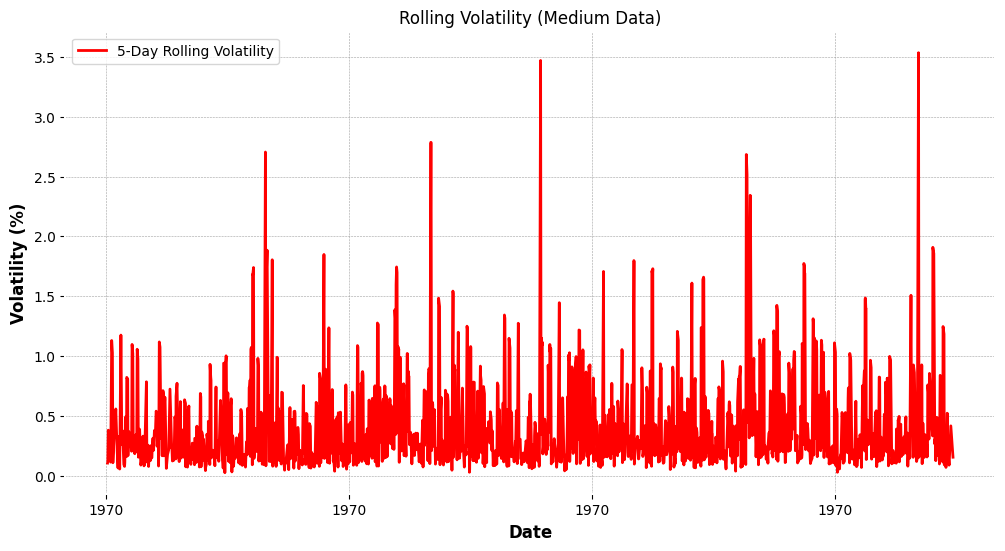

In [33]:
# Calculate daily returns
tm_medium_data['Daily_Return'] = tm_medium_data['Close'].pct_change() * 100  # Percentage change

# Calculate historical volatility (standard deviation of daily returns)
historical_volatility = tm_medium_data['Daily_Return'].std()

# Print historical volatility
print(f"Historical Volatility (Standard Deviation of Daily Returns): {historical_volatility:.2f}%")

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(tm_medium_data['Daily_Return'], label='Daily Returns', color='blue')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Daily Returns (Medium Data)')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.legend()
plt.show()

# Calculate rolling volatility (e.g., 5-day rolling standard deviation)
rolling_window = 5  # Adjust the window size as needed
tm_medium_data['Rolling_Volatility'] = tm_medium_data['Daily_Return'].rolling(window=rolling_window).std()

# Plot rolling volatility
plt.figure(figsize=(12, 6))
plt.plot(tm_medium_data['Rolling_Volatility'], label=f'{rolling_window}-Day Rolling Volatility', color='red')
plt.title('Rolling Volatility (Medium Data)')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.show()

# Stationarity Test

In [34]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(tm_medium_data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpret the result
if result[1] <= 0.05:
    print("The data is stationary (reject the null hypothesis).")
else:
    print("The data is non-stationary (fail to reject the null hypothesis).")

ADF Statistic: -1.5116041510923857
p-value: 0.5277633206466265
Critical Values:
   1%: -3.4322310380892618
   5%: -2.862371135477015
   10%: -2.5672124281161035
The data is non-stationary (fail to reject the null hypothesis).


In [35]:
# Apply differencing
tm_medium_data['Close_diff'] = tm_medium_data['Close'].diff().dropna()

In [36]:
tm_medium_data.isna().sum()

,0
Datetime,0
AdjClose,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,0
StdDev,0
UpperBand,0


In [37]:
# drop na
tm_medium_data.dropna(inplace=True)

In [38]:
# Recheck stationarity using ADF test
result = adfuller(tm_medium_data['Close_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] <= 0.05:
    print("The differenced data is stationary.")
else:
    print("The differenced data is still non-stationary.")

ADF Statistic: -20.423114826342456
p-value: 0.0
The differenced data is stationary.


<Figure size 1000x500 with 0 Axes>

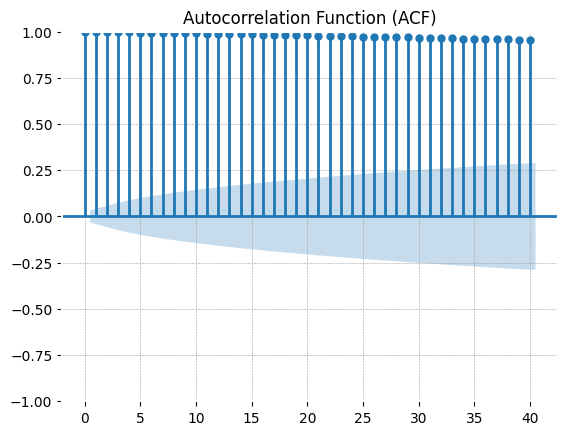

In [39]:
plt.figure(figsize=(10, 5))
plot_acf(tm_medium_data['Close'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

<Figure size 1000x500 with 0 Axes>

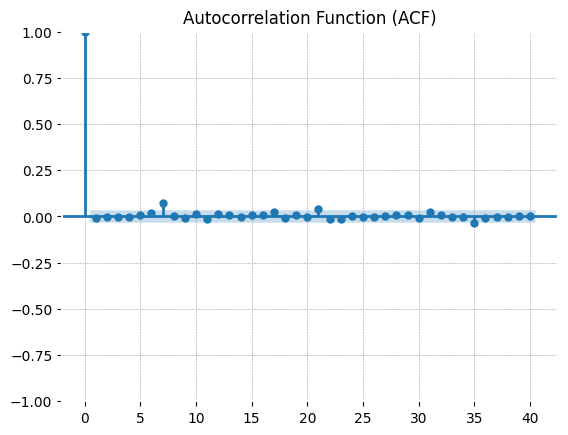

In [40]:
plt.figure(figsize=(10, 5))
plot_acf(tm_medium_data['Close_diff'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

In [41]:
tm_medium_data

,Datetime,AdjClose,Close,High,Low,Open,Volume,SMA,StdDev,UpperBand,LowerBand,RSI,Daily_Return,Rolling_Volatility,Close_diff
1970-01-01 00:00:00.000000005,2023-01-30 19:30:00+00:00,145.380005,145.380005,145.699997,145.300003,145.570007,22118,184.218703,8.754013,201.726730,166.710677,51.337371,-0.192228,0.104538,-0.279999
1970-01-01 00:00:00.000000006,2023-01-30 20:30:00+00:00,145.130005,145.130005,145.500000,145.089996,145.339996,25342,184.218703,8.754013,201.726730,166.710677,51.337371,-0.171963,0.113788,-0.250000
1970-01-01 00:00:00.000000007,2023-01-31 14:30:00+00:00,146.110001,146.110001,146.458694,145.880005,146.300003,29506,184.218703,8.754013,201.726730,166.710677,51.337371,0.675254,0.367924,0.979996
1970-01-01 00:00:00.000000008,2023-01-31 15:30:00+00:00,146.470001,146.470001,146.699997,146.184998,146.184998,17417,184.218703,8.754013,201.726730,166.710677,51.337371,0.246390,0.379501,0.360001
1970-01-01 00:00:00.000000009,2023-01-31 16:30:00+00:00,146.576797,146.576797,146.720001,146.365402,146.445007,15408,184.218703,8.754013,201.726730,166.710677,51.337371,0.072913,0.356736,0.106796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000003482,2025-01-28 16:30:00+00:00,184.779999,184.779999,184.800003,184.149994,184.539993,21092,180.593776,7.902358,196.398491,164.789061,49.086019,0.130056,0.286916,0.240005
1970-01-01 00:00:00.000003483,2025-01-28 17:30:00+00:00,185.274002,185.274002,185.359894,184.710007,184.770004,27813,180.614198,7.904801,196.423800,164.804596,49.785601,0.267347,0.355819,0.494003
1970-01-01 00:00:00.000003484,2025-01-28 18:30:00+00:00,184.985001,184.985001,185.410004,184.889999,185.360001,44903,180.633625,7.906811,196.447246,164.820003,48.715393,-0.155986,0.353167,-0.289001
1970-01-01 00:00:00.000003485,2025-01-28 19:30:00+00:00,185.139999,185.139999,185.429993,184.985001,184.985001,90210,180.654639,7.908572,196.471782,164.837495,50.607293,0.083790,0.310376,0.154999


# LSTM Model

In [ ]:
# get the Date out of the index
tm_medium_data.reset_index(inplace=True)

In [ ]:
# get the Date out of the index
tm_medium_data.reset_index(inplace=True)

In [ ]:
# isolet the Date and Sales columns
tm_medium_data = tm_medium_data[['Datetime', 'Close_diff']]

In [ ]:
tm_medium_data

,Datetime,Close_diff
0,2023-01-30 19:30:00+00:00,-0.279999
1,2023-01-30 20:30:00+00:00,-0.250000
2,2023-01-31 14:30:00+00:00,0.979996
3,2023-01-31 15:30:00+00:00,0.360001
4,2023-01-31 16:30:00+00:00,0.106796
...,...,...
3477,2025-01-28 16:30:00+00:00,0.240005
3478,2025-01-28 17:30:00+00:00,0.494003
3479,2025-01-28 18:30:00+00:00,-0.289001
3480,2025-01-28 19:30:00+00:00,0.154999


In [ ]:
# Split into training and testing sets based on index
train_size = int(len(tm_medium_data) * 0.8)  # 80% for training
train_data = tm_medium_data[:train_size]
test_data = tm_medium_data[train_size:]

In [ ]:
# set the date coumn as index
train_data.set_index('Datetime', inplace=True)
test_data.set_index('Datetime', inplace=True)

In [ ]:
train_data

,Close_diff
Datetime,
2023-01-30 19:30:00+00:00,-0.279999
2023-01-30 20:30:00+00:00,-0.250000
2023-01-31 14:30:00+00:00,0.979996
2023-01-31 15:30:00+00:00,0.360001
2023-01-31 16:30:00+00:00,0.106796
...,...
2024-08-30 17:30:00+00:00,0.300003
2024-08-30 18:30:00+00:00,0.150009
2024-08-30 19:30:00+00:00,0.449997


In [ ]:
# look at train data date range
train_data.index.min(), train_data.index.max()

(Timestamp('2023-01-30 19:30:00+0000', tz='UTC'),
 Timestamp('2024-09-03 14:30:00+0000', tz='UTC'))

In [ ]:
# look at the test data date range
test_data.index.min(), test_data.index.max()

(Timestamp('2024-09-03 15:30:00+0000', tz='UTC'),
 Timestamp('2025-01-28 20:30:00+0000', tz='UTC'))

In [ ]:
scaler = MinMaxScaler()

train_data.loc[:, 'x'] = scaler.fit_transform(train_data[['Close_diff']])
test_data.loc[:, 'x'] = scaler.transform(test_data[['Close_diff']])

In [ ]:
# Create sequences for the LSTM model
sequence_length = 100
train_sequences = []
test_sequences = []

for i in range(len(train_data) - sequence_length):
    train_sequences.append(train_data['x'].iloc[i:i+sequence_length].values)

for i in range(len(test_data) - sequence_length):
    test_sequences.append(test_data['x'].iloc[i:i+sequence_length].values)

train_sequences = np.array(train_sequences)
test_sequences = np.array(test_sequences)

In [ ]:
# Prepare train and test targets
train_targets = train_data['x'].iloc[sequence_length:].values
test_targets = test_data['x'].iloc[sequence_length:].values

In [ ]:
import time
start_time = time.time()

# Create and train an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_sequences.reshape(-1, sequence_length, 1), train_targets,
epochs=5, batch_size=32)

# Make predictions
test_predictions = model.predict(
                   test_sequences.reshape(-1, sequence_length, 1))

print(time.time() - start_time)

# Inverse transform the predictions to the original scale
test_predictions = scaler.inverse_transform(test_predictions).flatten()
test_targets = scaler.inverse_transform(test_targets.reshape(-1, 1))

Epoch 1/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0825
Epoch 2/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0019
Epoch 3/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0018
Epoch 4/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0018
Epoch 5/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.0017
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
31.60676074028015


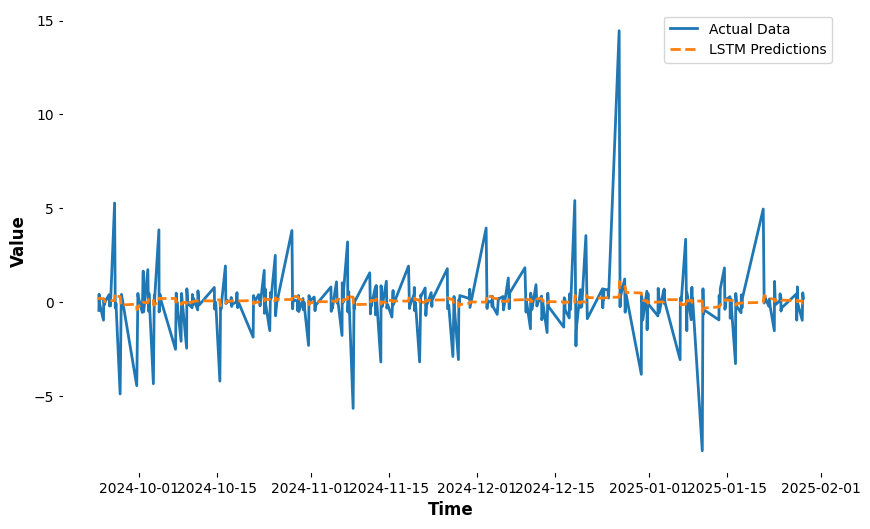

In [ ]:
# Plot the original data and LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
# measure of prediction accuracy
test_predictions_df = pd.DataFrame(test_predictions, columns = ["LSTM"])
test_targets_df = pd.DataFrame(test_targets, columns = ["actuals"])
predictions = pd.concat([test_predictions_df, test_targets_df], axis=1)

wape = (predictions['actuals'] - predictions['LSTM']).abs().sum() / predictions['actuals'].sum()

print(wape * 100)

-219122.74685004924


In [ ]:
# predict for the next one year
last_sequence = test_sequences[-1]
predicted_values = []

for _ in range(365):
    predicted_value = model.predict(last_sequence.reshape(1, sequence_length, 1))
    predicted_values.append(predicted_value[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_value

predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1)).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

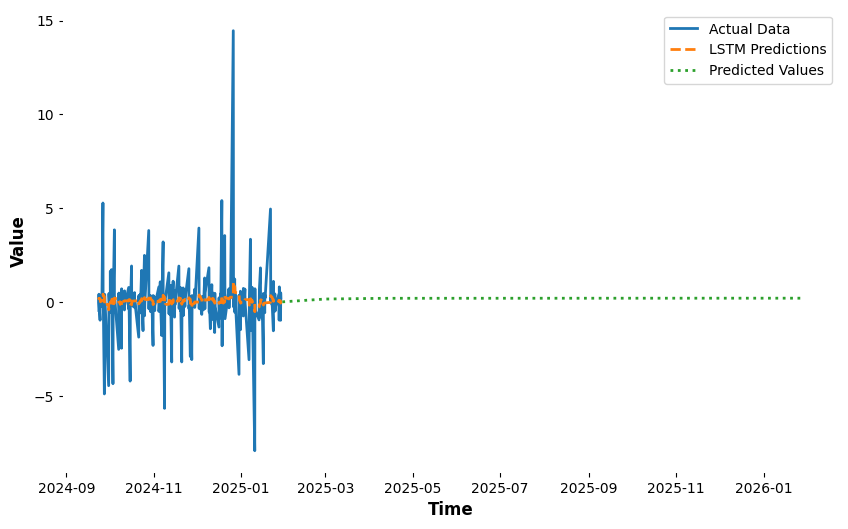

In [ ]:
# show in plot
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')

# Generate a date range for the predicted values
# Assuming your test_data has a daily frequency
from pandas.tseries.offsets import DateOffset
future_dates = pd.date_range(start=test_data.index[-1], periods=365 + 1, freq='D')[1:]  # Exclude the start date

# Now plot the predicted values against the future dates
plt.plot(future_dates, predicted_values,
         label="Predicted Values", linestyle=':')

plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()